# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [12]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Regresion lineal multivariable


## Creando modelo con scikit-learn

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)


LinearRegression()

## Análisis de resultados

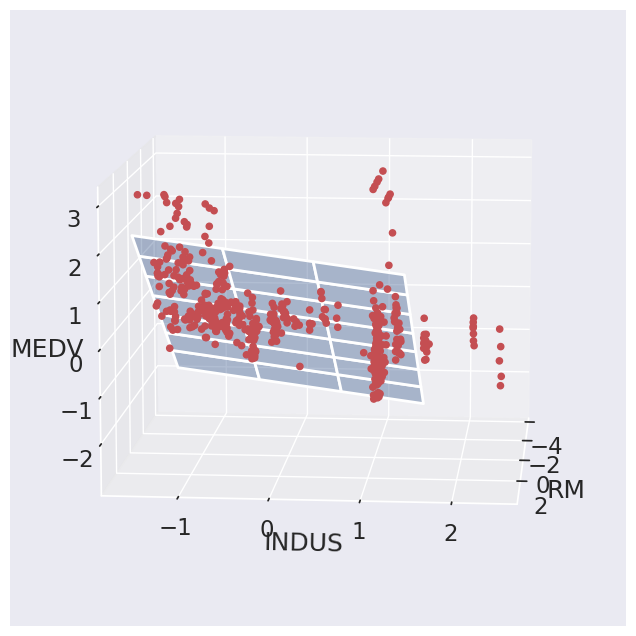

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np 

x1_range=np.arange(X_std[:,0].min(),X_std[:,0].max())
x2_range=np.arange(X_std[:,1].min(),X_std[:,1].max())
x1, x2 = np.meshgrid(x1_range,x2_range)

pred=slr.predict(np.array([x1.flatten(),x2.flatten()]).T).reshape(x1.shape)
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1,x2,pred, alpha=0.4, linewidth=2)
ax.scatter3D(X_std[:,0],X_std[:,1],y_std, color='r',alpha=1)
ax.view_init(elev=10,azim=5)
ax.set_xlabel('RM')
ax.set_ylabel('INDUS')
ax.set_zlabel('MEDV')
plt.show()


## Generando predicción con el modelo

In [41]:
num_rooms_std = sc_x.transform(np.array([5.0,10]).reshape(1, -1))
price_std = slr.predict(num_rooms_std)
print('El precio en miles es de %.3f'%
      sc_y.inverse_transform(price_std))



El precio en miles es de 12.865
